### Task 5. Algorithms on graphs. Introduction to Graphs and basic algorithms on graphs

### 5.1 Generate a random adjacency matrix for a simple undirected unweighted graph with 100 vertices and 200 edges (note that the matrix must be symmetric and contain only 0 and 1 as elements). Transform the matrix intoan adjacency list. 

### Visualize the graph and output several rows of the adjacency matrixand the adjacency list. For what purposes is it more convenient to useeach of the views?

adjacency matrix fragment:

 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

adjacency list fragment:

 [[9, 13, 93], [2, 61, 68, 71], [1, 5, 25, 53, 77], [5, 9, 25, 31, 40], [6, 45, 84, 86], [2, 3, 19, 49, 55, 95]]
Graph vizualization


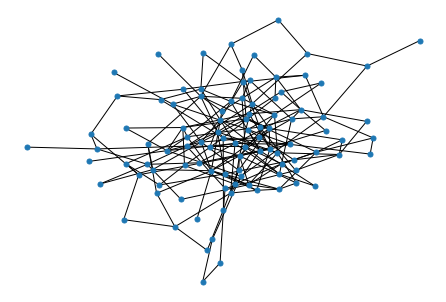

In [141]:
import random
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

nodes_num = 100
connections_num = 2 * nodes_num

adj_matrix = np.zeros([nodes_num, nodes_num])
counter = 0

while counter < connections_num:
    
    i, j = random.sample([i for i in range(nodes_num)], 2)
    
    if adj_matrix[i][j] == 0:
        
        adj_matrix[i][j] = adj_matrix[j][i] = 1
        counter += 1
        
graph = nx.Graph(adj_matrix)

print('adjacency matrix fragment:\n\n', adj_matrix)   # adjacency matrix - матрица смежности

adj_list = [list(np.where(adj_matrix[i] == 1)[0]) for i in range(nodes_num)]
print('\nadjacency list fragment:\n\n', adj_list[:6]) # adjacency list - список смежности

print('Graph vizualization')
nx.draw(graph, node_size = 25)                        # vizualization

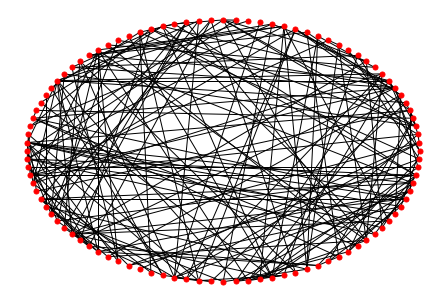

In [142]:
nx.draw_circular(graph, node_color = 'red', node_size = 25, with_labels = False)

#print(nx.dijkstra_path(graph, 0, 9))
#nx.draw(graph, pos = nx.spectral_layout(G), node_color = 'r', edge_color = 'b')

----------------------------------------------------------------------------------------------------------------------------

### 5.2 Use depth-first search and breadth-first search to find the connected components of the graph and the shortest path between two random vertices. Analyze the results obtained.


In [179]:

a, b = np.random.randint(0, nodes_num, 2)
print('Nodes: {}, {} \n'.format(a, b))


# поиск в ширину - BFS (breadth first search) 

edges = nx.bfs_edges(graph, a)
nodes = [a] + [v for u, v in edges]
print(np.array(nodes).T, '\n')

try:
    print('Distance beetween nodes using BFS: {} \n'.format(nodes.index(b)))
except:
    print('Error: No path between these nodes')
    
    
# поиск в глубину - DFS (depth first search) 

edges = nx.dfs_edges(graph, a)
nodes = [a] + [v for u, v in edges]
print(np.array(nodes).T, '\n')

try:
    print('Distance beetween nodes using DFS: {} \n'.format(nodes.index(b)))
except:
    print('Error: No path between these nodes')

Nodes: 49, 19 

[49  5 41 53 54 63 66 72 90 91 93 94 96  2  3 19 55 95  6  9 10 23 27 61
 64 70 76  8 16 97 36 69 26 56 60 83 39 12 20  0 67 84 46 86 37 89  1 25
 77 31 40  7 73 48 71 78  4 74 30 79 88 58 28 59 42 80 34 62 98 15 29 51
 32 57 81 65 38 85 99 13 21 82 52 45 87 18 68 24 50 47 92 22 44 17 33 75
 43 14 35 11] 

Distance beetween nodes using BFS: 15 

[49  5  2  1 61 12 21 37  9  0 13 39  8 19  7 18 85 46 45  4  6 41 10 54
 36 20 51 24 25  3 31 47 62 52 67 93 84 99 14 32 29 97 53 16 15 82 17 11
 35 87 79 30 28 56 63 26 57 43 81 38 60 71 22 27 58 34 40 75 73 48 55 80
 76 86 94 96 89 77 88 65 74 70 42 95 64 59 50 83 78 98 44 33 90 69 92 91
 66 72 23 68] 

Distance beetween nodes using DFS: 13 

